In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

In [34]:
def simpson(integrand,x_i,x_f,N_bins):
    h_step=np.float32((x_f-x_i)/N_bins)
    if N_bins%2!=0:
        raise ValueError("Simpson's Rule requires an even number of bins, but you have specified a non-even number of bins.")
    sum = 0

    for i in range(np.int32(N_bins/2)):
        sum += 4*integrand((2*i+1)*h_step + x_i)

    for i in range(np.int32((N_bins/2) - 1)):
        sum += 2*integrand((2*i+2)*h_step + x_i)
        
    sum += integrand(x_f) + integrand(x_i)
    return sum*(h_step/3)

def correlation_func(r, pk_spline, k_cutoff, nbins):
    epsilon = 1e-5
    integrand = lambda k: (k**2)*pk_spline(k)*np.sin(k*r)/(k*r)
    integral = simpson(integrand, epsilon, k_cutoff, nbins)
    return (1/(2*(np.pi**2)))*integral


In [35]:
try:
    with open('./lcdm_z0.matter_pk', 'r') as file:
        data_array = np.genfromtxt(file,delimiter=' ')
except FileNotFoundError:
    print("Error: The file 'lcdm_z0.matter_pk' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

k_array = np.zeros(len(data_array))

Pk_array = np.zeros(len(data_array))

for i in range(len(data_array)):
    k_array[i]=data_array[i][0]
    Pk_array[i]=data_array[i][1]

Pk_spline = CubicSpline(k_array, Pk_array)

In [98]:
r_array = np.linspace(50,120,100)
c1 = correlation_func(r_array,Pk_spline,2000,int(1e6))
c2 = correlation_func(r_array,Pk_spline,2000,int(2e6))
c3 = correlation_func(r_array,Pk_spline,2000,int(4e6))
c1_ = correlation_func(r_array,Pk_spline,1000,int(2e6))
c2_ = correlation_func(r_array,Pk_spline,2000,int(2e6))
c3_ = correlation_func(r_array,Pk_spline,3000,int(4e6))

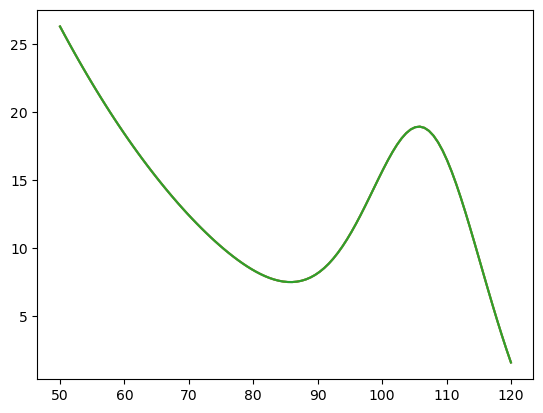

In [99]:
plt.plot(r_array,(r_array**2)*c1)
plt.plot(r_array,(r_array**2)*c2)
plt.plot(r_array,(r_array**2)*c3)
#plt.plot(r_array,(r_array**2)*correlation_func(r_array,Pk_spline,1000,int(1e6)))

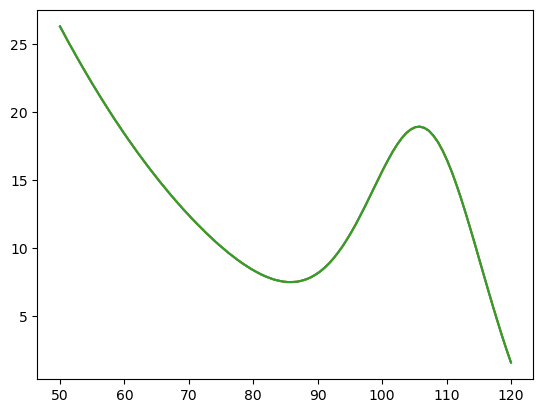

In [100]:
plt.plot(r_array,(r_array**2)*c1_)
plt.plot(r_array,(r_array**2)*c2_)
plt.plot(r_array,(r_array**2)*c3_)

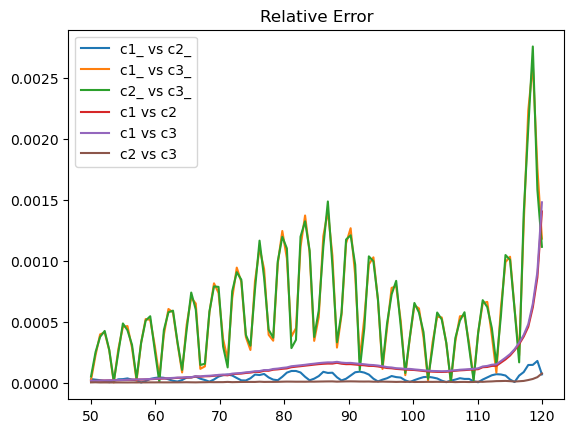

In [101]:
plt.plot(r_array,np.abs(c1_ - c2_)/c2_,label='c1_ vs c2_')
plt.plot(r_array,np.abs(c1_ - c3_)/c3_,label='c1_ vs c3_')
plt.plot(r_array,np.abs(c2_ - c3_)/c3_,label='c2_ vs c3_')
plt.plot(r_array,np.abs(c1 - c2)/c2,label='c1 vs c2')
plt.plot(r_array,np.abs(c1 - c3)/c3,label='c1 vs c3')
plt.plot(r_array,np.abs(c2 - c3)/c2,label='c2 vs c3')
plt.title('Relative Error')
plt.legend()